In [1]:
import math
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
sns.set_style("whitegrid")

In [2]:
data = pd.read_csv("insurance.csv")
data['sex'] = data['sex'].astype("category")
data['region'] = data['region'].astype("category")
data['smoker'] = data['smoker'].astype("category")

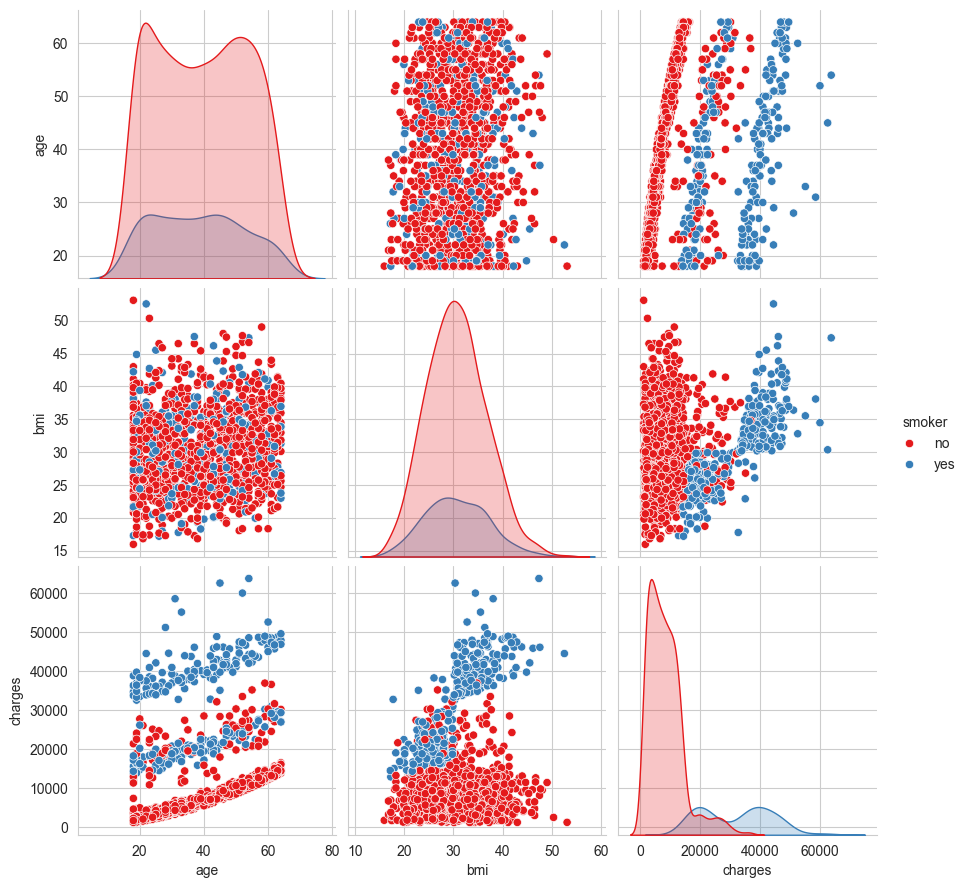

In [3]:
sns.pairplot(
    data[["age", "bmi", "charges", "smoker"]],
    hue="smoker",
    height=3,
    palette="Set1"
)

In [4]:
data = pd.get_dummies(data)

In [5]:
y = data['charges']
x = data.drop('charges', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.80, random_state=1)

In [6]:
lr = LinearRegression()
lr.fit(x_train, y_train)
print("Test :", lr.score(x_test, y_test).round(3))
print("Train :", lr.score(x_train, y_train).round(3))

Test : 0.762
Train : 0.748


In [7]:
y_pred = lr.predict(x_test)
print("STANDARD DEVIATION (sq. root(mean squared error)) :", math.sqrt(mean_squared_error(y_test, y_pred)))

STANDARD DEVIATION (sq. root(mean squared error)) : 5956.454717976427


In [8]:
data_new = x_train[:1]
print('Prediction:', lr.predict(data_new))
print('Real Value:', y_train[:1])

Prediction: [10508.41885042]
Real Value: 216    10355.641
Name: charges, dtype: float64
